Pandas
======

Back when I was a lad the data frame was an abstraction limited to R and we managed our data using a pile of homogeneos but distinct objects. Unsurprisingly, R still has the best data frame support.

Pandas is what Python has and its very Pythonic (in the sense that its weird, has a confusing API, and an even stranger set of internal representations). But we must accept it as the way of things.

Fun Facts
==========

There are a few packages which implement dplyr like programming for DataFrames in Python. You can use these if you just want to get in and get out in Python without the headache of using pandas directly. Unfortunately, if you want to do any serious work in Python, or if it is the main language that a project you are working on uses, then you probably want to just program with pandas.

```
RUN pip3 install dplython
```

A more standardish alternative to using dplython is to use SQL to manipulate your Python Dataframes. This is a little unusual but your collaborators will almost all certainly have a passing familiarity with SQL.

```
RUN pip3 install pandasql
```

We'll show some examples of what this looks like later.

Dot Chaining
============

Recall that Python is a single dispatch object oriented language. That means objects carry around their methods and methods are like functions which always receive their object as their first argument.

An interesting thing can happen when you write methods that return the object itself (or some other object): you can chain a bunch of "commands" together into a "dot-chain" and write a concise little sequence of instructions which apply (conceptually) to a single object in a pipeline:


In [1]:
class StackProgram:
    stack = None;
    def __init__(self):
        self.stack = [];
    def push(self, v):
        self.stack.append(v)
        return self;
    def add(self):
        a = self.stack.pop();
        b = self.stack.pop();
        self.push(a+b);
        return self;
    def times(self):
        a = self.stack.pop();
        b = self.stack.pop();
        self.push(a*b);
        return self;
    def div(self):
        a = self.stack.pop();
        b = self.stack.pop();
        self.push(a/b);
        return self;
    def sub(self):
        a = self.stack.pop();
        b = self.stack.pop();
        self.push(a-b);
        return self;
    def prnt(self):
        a = self.stack.pop();
        print(a)
        return self;
    def pop(self):
        return self.stack.pop();
    def dup(self):
        self.stack.append(self.stack[-1]);
        return self;

Note that all our methods return `self`. That we we can write a little program like this:

In [33]:
StackProgram().push(1).push(2).add().prnt()

3


Note that if you want to run this over multiple lines without escaping the newlines you need to enclose the whole thing in parentheses.

In [34]:
(StackProgram()
 .push(123)
 .push(200)
 .times().prnt())

24600


If you squint this may resemble the usage of the `pipeline` operator `%>%` from R. The main restriction which applies to these `dot pipes` is that the object itself must implement the method you want to use, whereas any function whatsoever (which makes sense) in a `%>%` pipe may be used. However, this is the closest and most idiomatic way of writing a pipeline in Python. You'll see this many more places than Pandas.

Pandas
======

Pandas is one of those things which is all about network effects, which is pretty much what using Python is all about. It was originally written by Wes McKinney, a finance dude, and its sort of a wrapper over numpy. Let's remind ourselves of the basics of that library.



In [2]:
# Importing numpy
import numpy as np

# 1. Array Creation
# Creating a 1D array
arr1d = np.array([1, 2, 3])

# Creating a 2D array
arr2d = np.array([[1, 2, 3], [4, 5, 6]])

# Creating arrays with specific shapes and values
zeros = np.zeros((2, 3))    # 2x3 array of zeros
ones = np.ones((3, 2))      # 3x2 array of ones
identity = np.eye(3)        # 3x3 identity matrix

# Creating arrays with sequences
sequence = np.arange(0, 10, 2)    # array from 0 to 10, step 2
linspace = np.linspace(0, 1, 5)   # 5 equally spaced values from 0 to 1

# 2. Basic Operations
# Element-wise operations
arr = np.array([1, 2, 3])
arr_squared = arr ** 2      # Squaring elements
arr_sum = arr + 2           # Adding a scalar to each element

# Array operations
dot_product = np.dot(arr, arr)    # Dot product
matrix_mult = np.dot(arr2d, arr2d.T) # Matrix multiplication (2D arrays)

# Universal functions (applies to each element)
sqrt = np.sqrt(arr)
exp = np.exp(arr)

# 3. Indexing and Slicing
# 1D indexing
print(arr[0])               # Access first element
print(arr[-1])              # Access last element

# 2D indexing
print(arr2d[0, 1])          # Element at first row, second column
print(arr2d[:, 1])          # All rows, second column

# Boolean indexing
bool_index = arr[arr > 1]   # Elements greater than 1

# 4. Reshaping Arrays
# Reshape 1D to 2D
reshaped = np.arange(6).reshape((2, 3))

# Transposing arrays
transposed = arr2d.T        # Transpose 2D array

# 5. Aggregations and Statistics
sum_total = np.sum(arr)             # Sum of all elements
mean_val = np.mean(arr)             # Mean
max_val = np.max(arr)               # Maximum
min_val = np.min(arr)               # Minimum
std_dev = np.std(arr)               # Standard deviation


1
3
2
[2 5]


As we'll see, a pandas data frame is a set of named columns which are basically numpy arrays of values with a few extra things tacked on, "Series" objects. The big difference is the idea of an index, which, if we come from dplyr we will mostly find to be an inconvenience.

Translating Dplyr to Pandas
===========================

Once you get a hang of this, translating Dplyr Code to Pandas is just a matter of digging up the right method or combination of methods to do what you want and chaining them together.

In [1]:
!wget http://millionsongdataset.com/sites/default/files/AdditionalFiles/track_metadata.db

--2024-10-28 18:35:59--  http://millionsongdataset.com/sites/default/files/AdditionalFiles/track_metadata.db
Resolving millionsongdataset.com (millionsongdataset.com)... 172.104.14.177
Connecting to millionsongdataset.com (millionsongdataset.com)|172.104.14.177|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 746180608 (712M)
Saving to: ‘track_metadata.db.3’

track_metadata.db.3 100%[===================>] 711.61M  14.6MB/s    in 53s     

2024-10-28 18:36:53 (13.3 MB/s) - ‘track_metadata.db.3’ saved [746180608/746180608]



In [3]:
import pandas as pd;
songs = pd.read_csv("songs.csv");

In [4]:
songs.head(3) # head(songs)

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0


In [5]:
songs.query('artist_name == "Guided By Voices"').head() # songs %>% filter(artist_name == "Guided By Voices")

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
145418,TRHVATC128F4249685,Liar's Tale,SOMPJZX12A8C137161,Self-Inflicted Aerial Nostalgia,ARI28971187FB57288,6c85f4c3-026c-4c16-9a7c-f546f42ed0fb,Guided By Voices,117.02812,0.762434,0.463792,1989,2705734,-1,0
169868,TRCIYDU128F425B61A,Blue Moon Fruit,SOXPAEN12A58A78D36,Get Out Of My Stations,ARI28971187FB57288,6c85f4c3-026c-4c16-9a7c-f546f42ed0fb,Guided By Voices,93.20444,0.762434,0.463792,1994,2783997,-1,0
206491,TRRZETT128F42376B3,Break Even,SOBLFLB12A58A7AB0A,The Grand Hour,ARI28971187FB57288,6c85f4c3-026c-4c16-9a7c-f546f42ed0fb,Guided By Voices,148.81914,0.762434,0.463792,1993,2627978,-1,0
223987,TRRDIWV128F424120B,Choking Tara (Creamy Version),SORYPZZ12A8C133A45,Everything Is Nice: The Matador Records 10th A...,ARI28971187FB57288,6c85f4c3-026c-4c16-9a7c-f546f42ed0fb,Guided By Voices,136.30649,0.762434,0.463792,1999,2082231,-1,0
231053,TRBMBOA12903CEBA97,The Tumblers,SOJZBJQ12AC468D820,Devil Between My Toes,ARI28971187FB57288,6c85f4c3-026c-4c16-9a7c-f546f42ed0fb,Guided By Voices,159.71220,0.762434,0.463792,1987,6649946,-1,0


Manifestly, the pandas equivalent of 'filter' is 'query' which takes a string rather than an expression. `query` allows you to write expressions which are Python-like without being exactly like Python. There are several differences:

1. slight differences in operator precedence
2. use @variable to reference variables in the enclosing scope
3. use \`some name\` to reference columns which have names which aren't valid Python variable names.

There are other issues which may crop up. At the expense of performance you can tell query that you really want to run real Python code by saying `parser='python'` as a keyword argument. This is slower.

Select :: Filter
================

Very confusingly what we called `select` in in SQL and in dplyr Pandas calls `filter,` a truly egregiously bad name.

In [38]:
(songs.query('artist_name == "Guided By Voices"')
 .filter(['title','release','year'])
 .sort_values(['release','year'])) # 
# songs %>% filter(artist_name == "Guided By Voices") %>% select(title, release, year) %>% arrange(release, year)


,title,release,year
0,Silent Night,Monster Ballads X-Mas,2003
1,Tanssi vaan,Karkuteillä,1995
2,No One Could Ever,Butter,2006
3,Si Vos Querés,De Culo,2003
4,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,0
...,...,...,...
999995,O Samba Da Vida,Pacha V.I.P.,0
999996,Jago Chhadeo,Naale Baba Lassi Pee Gya,0
999997,Novemba,Dub_Connected: electronic music,0
999998,Faraday,The Trance Collection Vol. 2,0


Note that we also snuck in a `sort_values` (Python) for `arrange` (dplyr) or `order by` (SQL).

Grouping and Summarizing
========================

This stuff works a little differently and I don't like it!

In [41]:
songs_per_year = (
    songs[songs['year'] >= 1900]  # Filter the DataFrame for years >= 1900
    .groupby('year')  # Group by 'year'
    .size()  # Count the number of records per group
    .reset_index()  # Reset index and name the count column
    .sort_values('year', ascending=False)  # Sort by 'year' in descending order
)
songs_per_year

,year,0
88,2011,1
87,2010,9397
86,2009,31051
85,2008,34770
84,2007,39414
...,...,...
4,1927,43
3,1926,19
2,1925,7
1,1924,5


One wonders how this material was sampled.
At this point its probably worth getting into plotting, since we don't always want to go back into R to make a few plots.

As an R partisan, I think the best plotting system in terms of convenience is ggplot, but we may as well review how to do it in Python without using plotnine.


In [25]:

songs_per_year = (songs.query('year >= 1900')
 .groupby('year',as_index=False)
 .apply(lambda x: pd.Series({'count':x['year'].size}))
 .sort_values('year',ascending=True))
songs_per_year

,year,count
0,1922,6
1,1924,5
2,1925,7
3,1926,19
4,1927,43
...,...,...
84,2007,39414
85,2008,34770
86,2009,31051
87,2010,9397


Plotting
========

May as well plot some data!

Matplotlib
----------



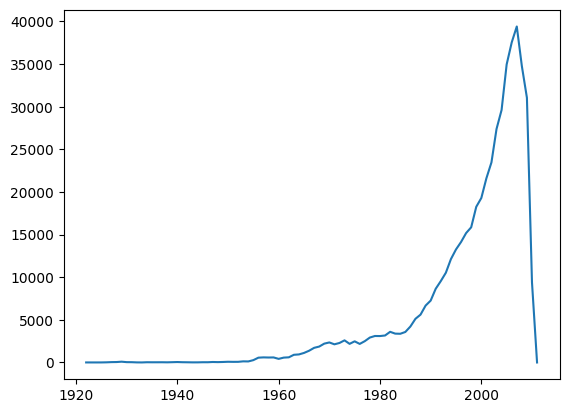

In [26]:
import matplotlib.pyplot as plt

plt.plot(songs_per_year["year"], songs_per_year["count"])

In [15]:
songs.columns

Index(['track_id', 'title', 'song_id', 'release', 'artist_id', 'artist_mbid',
       'artist_name', 'duration', 'artist_familiarity', 'artist_hotttnesss',
       'year', 'track_7digitalid', 'shs_perf', 'shs_work'],
      dtype='object')

This is a little silly of an example, but you have to use a totally different method entirely to make a scatterplot:

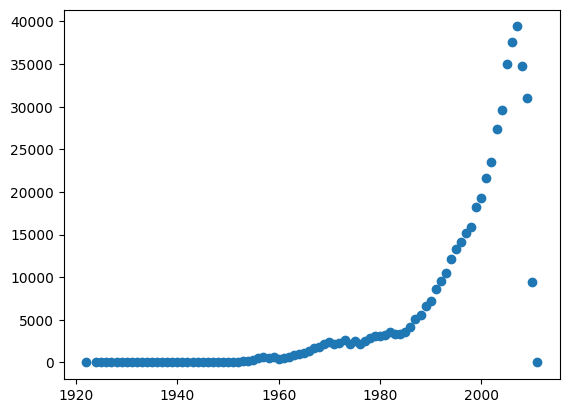

In [27]:
plt.scatter(songs_per_year["year"], songs_per_year["count"])

Just to have something to do let's try and look at the number of albums per year at the same time.

In [42]:
albums_per_year = (songs
 .query('year >= 1900')
 .groupby(['release','year'], as_index=False)
 .apply(lambda x: pd.Series({'count':x['year'].size}))
 .groupby('year', as_index=False)
 .apply(lambda x: pd.Series({'count':x['year'].size}))
 .sort_values('year'))
albums_per_year

,year,count
0,1922,3
1,1924,4
2,1925,7
3,1926,15
4,1927,33
...,...,...
84,2007,8545
85,2008,7537
86,2009,6159
87,2010,2040


Now that we have these two, related, data sets let's go ahead and do a join:

In [46]:
count_data = (pd.merge(albums_per_year, 
                       songs_per_year, on="year", how="inner", suffixes=("_albums", "_songs")))
count_data


,year,count,0
0,1922,3,6
1,1924,4,5
2,1925,7,7
3,1926,15,19
4,1927,33,43
...,...,...,...
84,2007,8545,39414
85,2008,7537,34770
86,2009,6159,31051
87,2010,2040,9397


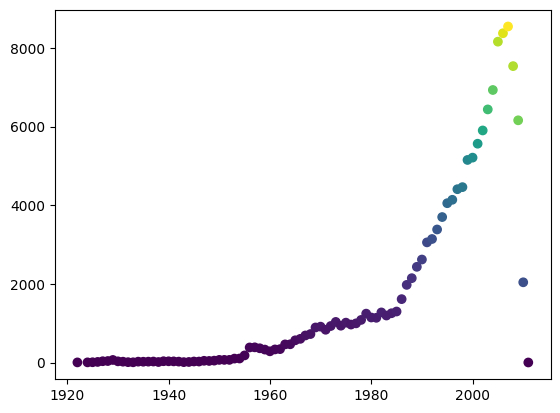

In [48]:
plt.scatter(count_data["year"],
            count_data["count"],
            c=count_data[0])

Of course, this is a little silly - we probably should calculate average album length per year and normalize these colors somehow, but whatever.

For the sake of brevity I will not bore you with extensive demonstrations of plotting with Matplotlib or Plotly, though will will look at Bokeh in greater detail soon.

But the idea with these libraries is, fundamentally, the same as in Matplotlib, although with different amounts of scut-work: you must identify the plot type you want, find the appropriate function from the package, and customize the plot with keyword arguments.

Pandasqsl & SQLDF
=================

Both R and Python provide libraries which allow you to use SQL (lite) on Dataframes Directly. They work very similarly.

In [31]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

pysqldf("select * from count_data limit 10")

,year,count_albums,count_songs
0,1922,3,6
1,1924,4,5
2,1925,7,7
3,1926,15,19
4,1927,33,43
5,1928,38,52
6,1929,65,93
7,1930,30,40
8,1931,21,35
9,1932,9,11


It is as simple as that - note that we are actually playing a little with the global environment in this example. In general, when you invoke sqldf you will need to provide a dictionary with the data frames in it. As a more complicated example (relevant to the homework):

In [32]:
sqldf("""select a.year, 
                a.count as count_albums, 
                s.count as count_songs from album_counts a
      join song_counts s on a.year = s.year""", {"album_counts":albums_per_year, 
                                                 "song_counts":songs_per_year})

,year,count_albums,count_songs
0,1922,3,6
1,1924,4,5
2,1925,7,7
3,1926,15,19
4,1927,33,43
...,...,...,...
84,2007,8545,39414
85,2008,7537,34770
86,2009,6159,31051
87,2010,2040,9397
